<a href="https://colab.research.google.com/github/atamurodovanodira/Fuzzy-Logic-Image-Processing/blob/main/FuzzyLogicImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy

In [2]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=32641a43423bce26f8146d152b28ee1ef8690d2324fdbf06e2c8928641c52370
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
pip install matplotlib

In [4]:
pip install scikit-Image

In [5]:
from skimage import color, filters, io
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt



In [6]:
# Rasmni yuklang
Irgb = io.imread('meva.jpg')

# Kulrang rangga aylantiring
Igray = color.rgb2gray(Irgb)


In [7]:
# Qirralarni aniqlash
edges = filters.sobel(Igray)

# Chegara mustahkamligi uchun aʼzolik funksiyalarini aniqlang
x_edge_strength = np.arange(0, 1.01, 0.01)
mf_edge_strength = fuzz.trimf(x_edge_strength, [0, 0, 1])

# Qirra yo’nalishi uchun a'zolik funktsiyalarini aniqlang
x_edge_orientation = np.arange(-np.pi, np.pi, 0.01)
mf_edge_orientation = fuzz.trimf(x_edge_orientation, [-np.pi, 0, np.pi])


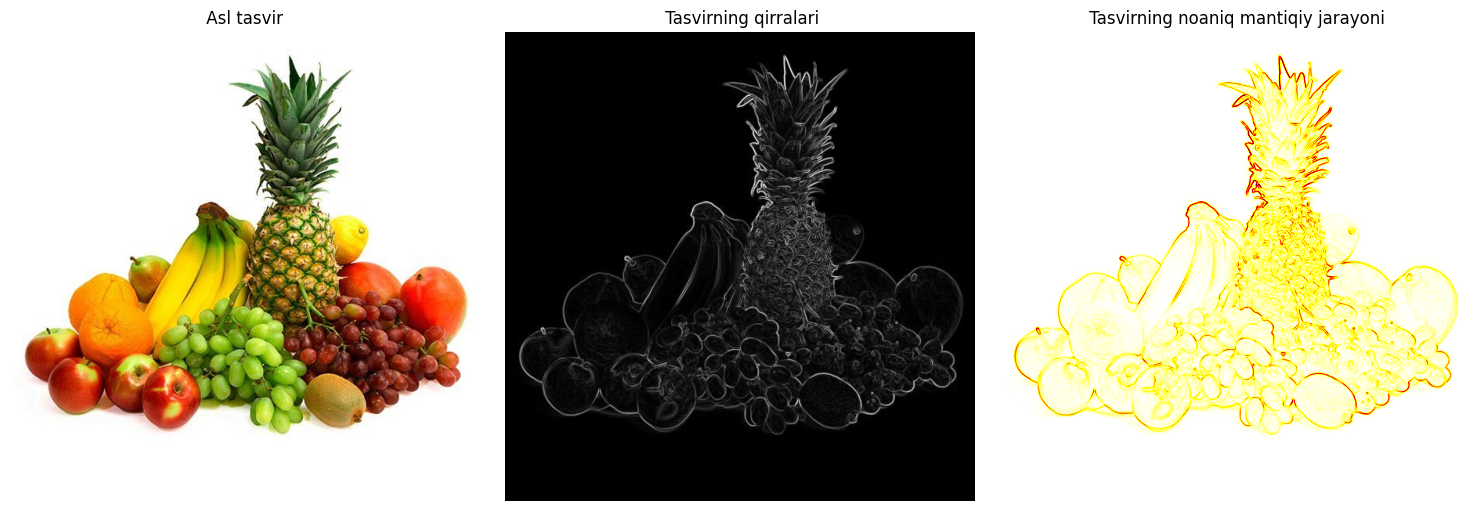

In [9]:
# Yo’nalish qiymatini aniqlang
orientation = 0.5

# Qirra chegarasi va qirra yo'nalishi uchun a'zolik qiymatlarini hisoblang
membership_strength = fuzz.interp_membership(x_edge_strength, mf_edge_strength, edges)
membership_orientation = fuzz.interp_membership(x_edge_orientation, mf_edge_orientation, orientation)

# Noravshan tasvirini yarating
fuzzy_edge_map = membership_strength * membership_orientation

# Asl tasvir , Tasvirning qirralari , Tasvirning noaniq mantiqiy jarayoni
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].imshow(Irgb)
axes[0].set_title(' Asl tasvir ')
axes[0].axis('off')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title(' Tasvirning qirralari')
axes[1].axis('off')
axes[2].imshow(fuzzy_edge_map, cmap='hot')
axes[2].set_title(' Tasvirning noaniq mantiqiy jarayoni')
axes[2].axis('off')

plt.tight_layout()
plt.show()
